In [1]:
# ---- Imports ----

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)


In [2]:
# ---- 1. Load the Dataset ----

iris = datasets.load_iris()

X = iris.data      # features
y = iris.target    # labels
target_names = iris.target_names
feature_names = iris.feature_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df["species"] = [target_names[label] for label in y]

print("First 5 rows of the dataset:")
display(df.head())

print("\nClass distribution:")
display(df["species"].value_counts())


First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Class distribution:


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

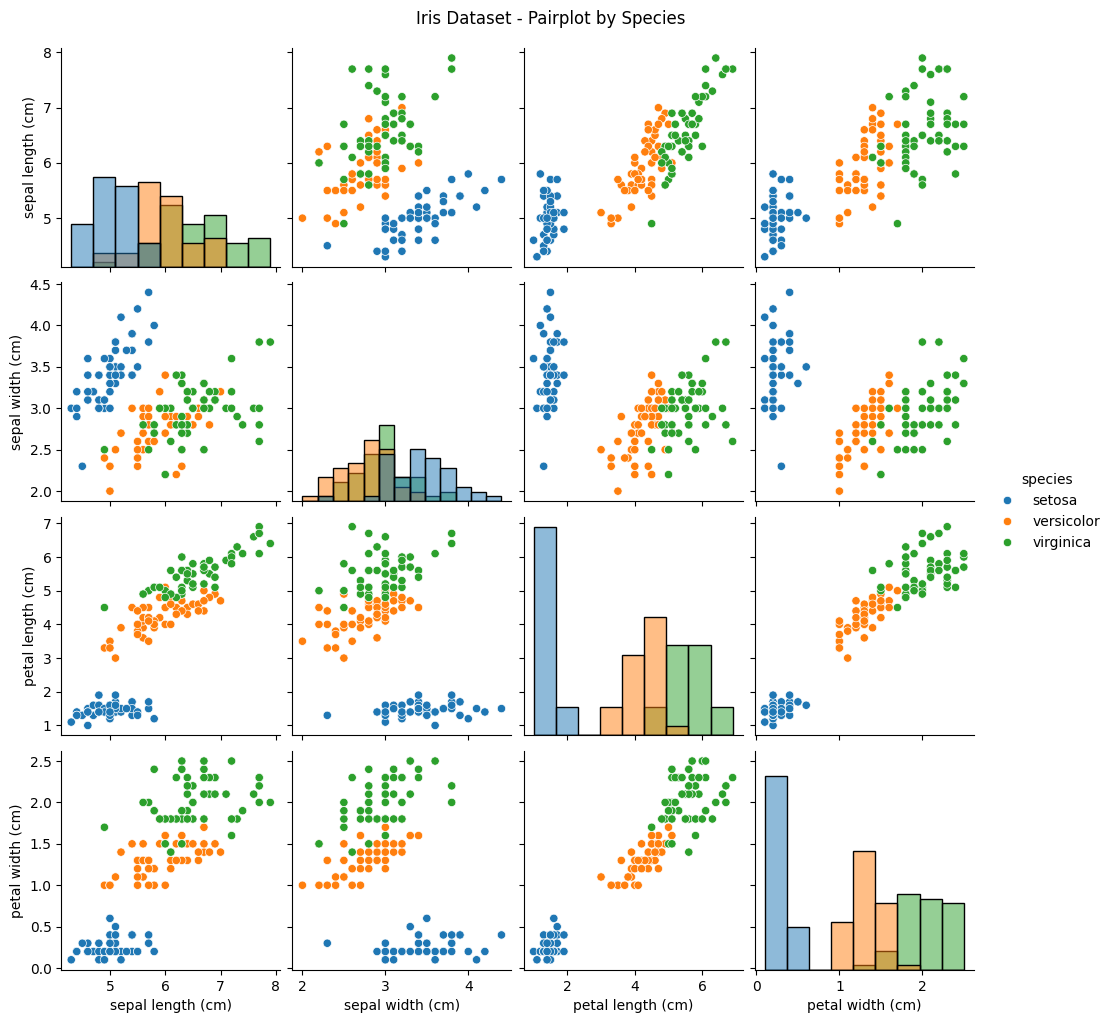

In [3]:
# ---- 2A. Visual Exploration (Pairplot) ----

sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Iris Dataset - Pairplot by Species", y=1.02)
plt.show()


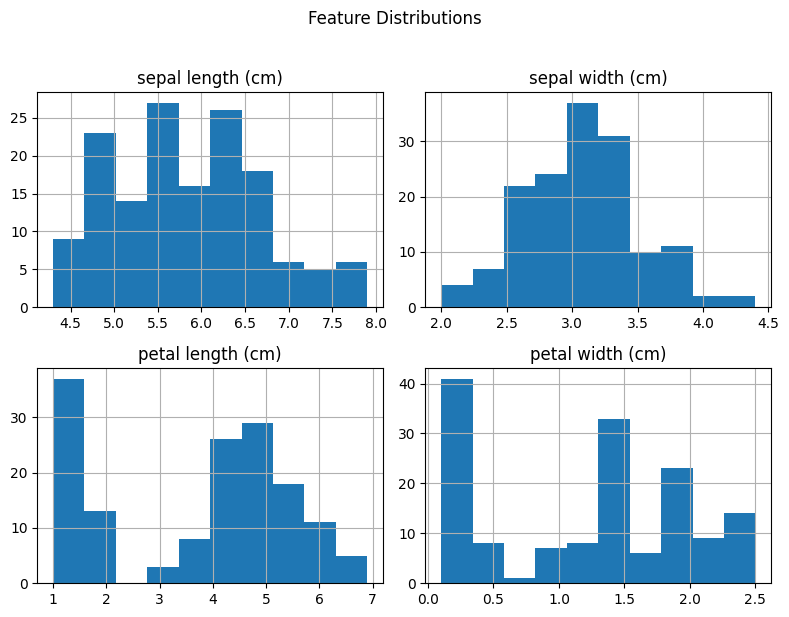

In [4]:
# ---- 2B. Histograms for Each Feature ----

df[feature_names].hist(figsize=(8, 6))
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()


In [5]:
# ---- 3. Train-Test Split ----

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 120
Test size: 30


In [6]:
# ---- 4. Preprocessing (Scaling) ----

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# ---- 5. Train Classifier (KNN) ----

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

print(f"KNN model trained with k={k}")


KNN model trained with k=5


In [8]:
# ---- 6. Evaluate Model ----

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (k={k}): {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy (k=5): 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



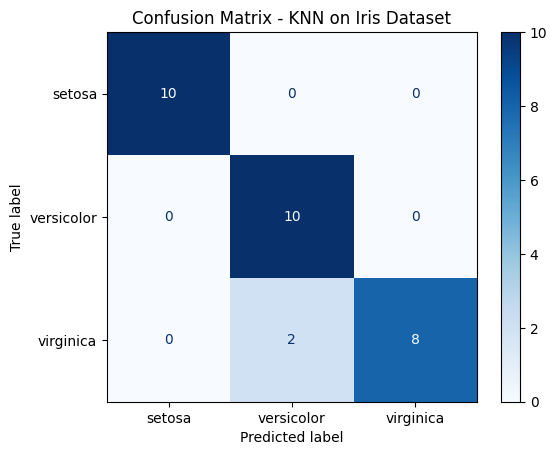

In [9]:
# ---- Confusion Matrix ----

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN on Iris Dataset")
plt.show()
